### Keras - QMNIST MLP

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import numpy as np

from DL_utils import Analyze_training
import tensorflow as tf
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.ERROR)

    A couple of utility functions

In [29]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return
# Uploads into 4 arrays contents of MNIST.npz
# Test file of 60.000 digits
def QMNIST_load_data(file_name):
   file = np.load('e:/QMNIST.npz')
   a = file['arr_0']
   b = file['arr_1']
   c = file['arr_2']
   d = file['arr_3']
   return (a,b),(c,d)

    Observe how different is the graph of accuracy and loss

In [33]:
batch_size = 128
num_classes = 10
epochs = 20
hlayer1 = 512
hlayer2 = 512

    Prepare Data now test has 60000 digit samples

In [31]:
file_name = 'e:/QMNIST.npz'
(x_train, y_train),(x_test, y_test) = QMNIST_load_data(file_name)
# we add values and obtain train 100.000, test 10.000 val 10000
x_train = np.append(x_train,x_test[0:40000],axis=0)
y_train = np.append(y_train,y_test[0:40000],axis=0)
x_test1= x_test[40000:50000]
y_test1= y_test[40000:50000]
x_val  = x_test[50000:60000]
y_val  = y_test[50000:60000]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train = x_train.reshape(len(x_train), 784)
x_test1 = x_test1.reshape(len(x_test1), 784) 
x_val = x_val.reshape(len(x_val),784)

x_train = x_train.astype('float32')
x_test1 = x_test1.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_test1 /= 255
x_val /= 255
print(x_train.shape[0], 'train samples')
print(x_test1.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')


(100000, 28, 28) (100000,)
(60000, 28, 28) (60000,)
100000 train samples
10000 test samples
10000 validation samples


In [34]:

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test1 = to_categorical(y_test1, num_classes)
y_val = to_categorical(y_val, num_classes)
y_train.shape

(100000, 10)

    Definition of a Simple [784:512:512:10] Network

In [35]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dropout(rate=0.2))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


    Fit Trains Network !

Train on 100000 samples, validate on 10000 samples
Epoch 1/20
100000/100000 [==============================] - 14s 141us/step - loss: 0.1960 - acc: 0.9393 - val_loss: 0.1000 - val_acc: 0.9691
Epoch 2/20
100000/100000 [==============================] - 13s 126us/step - loss: 0.0874 - acc: 0.9740 - val_loss: 0.0789 - val_acc: 0.9773
Epoch 3/20
100000/100000 [==============================] - 13s 130us/step - loss: 0.0678 - acc: 0.9796 - val_loss: 0.0885 - val_acc: 0.9775
Epoch 4/20
100000/100000 [==============================] - 14s 138us/step - loss: 0.0562 - acc: 0.9832 - val_loss: 0.0883 - val_acc: 0.9785
Epoch 5/20
100000/100000 [==============================] - 19s 191us/step - loss: 0.0499 - acc: 0.9856 - val_loss: 0.0850 - val_acc: 0.9805
Epoch 6/20
100000/100000 [==============================] - 17s 165us/step - loss: 0.0457 - acc: 0.9873 - val_loss: 0.0865 - val_acc: 0.9795
Epoch 7/20
100000/100000 [==============================] - 13s 133us/step - loss: 0.0412 - acc: 0.9885

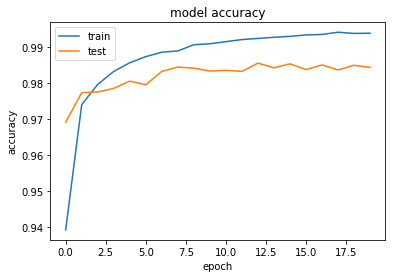

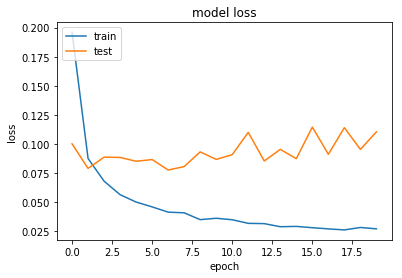

In [36]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test1, y_test1))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Analyze_training(history)